In [1]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”


 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

# subset the data to only include Wahlberg F2s

In [5]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [6]:
idvec <- IDs[, 'V1']

In [7]:
idvec <- as.double(idvec)

In [8]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [9]:
#subset
datf2= subset(datf2, ind = all_individs)

In [10]:
summary(datf2)

    F2 intercross

    No. individuals:    839 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 93.4 93.4 100 100 100 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  79.4 
    Genotypes (%):      AA:24.5  AB:49.5  BB:25.9  not BB:0.0  not AA:0.0 

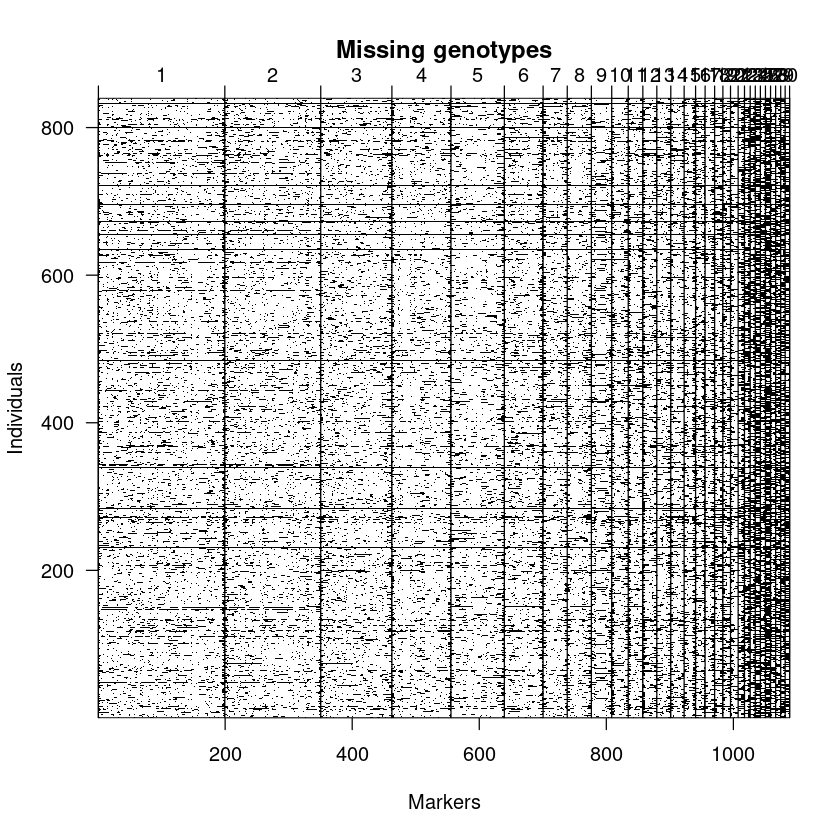

In [11]:
plotMissing(datf2)

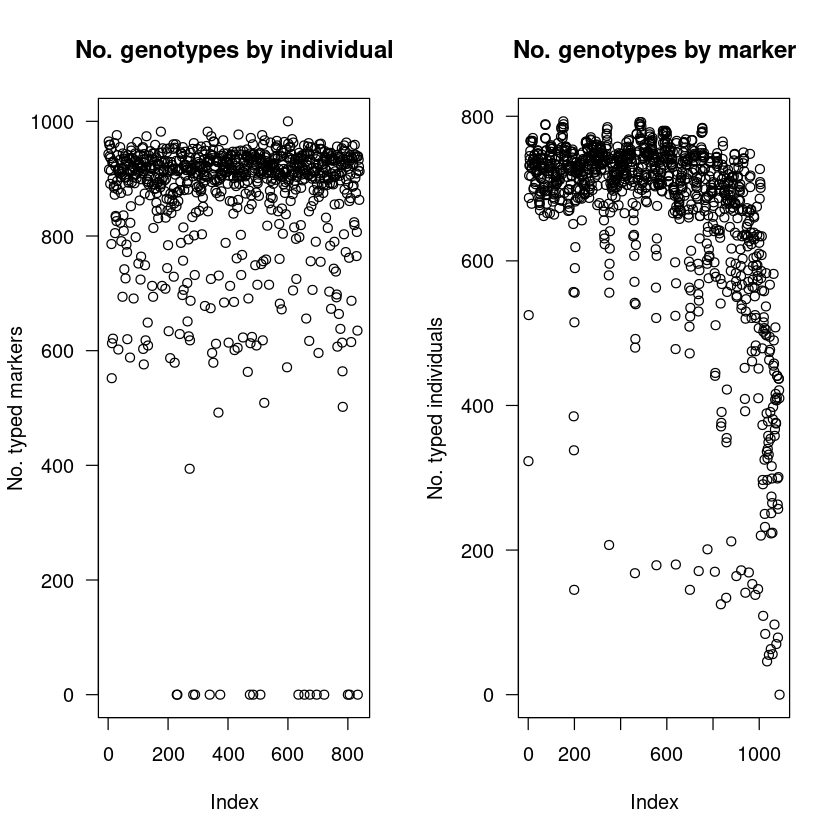

In [12]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [13]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [14]:
todrop

[1] "22-8" "23-7" "24-7" "25-7" "26-7" "27-7" "28-7" "29-6" "30-6"

In [15]:
datf2.1 <- drop.markers(datf2, todrop)

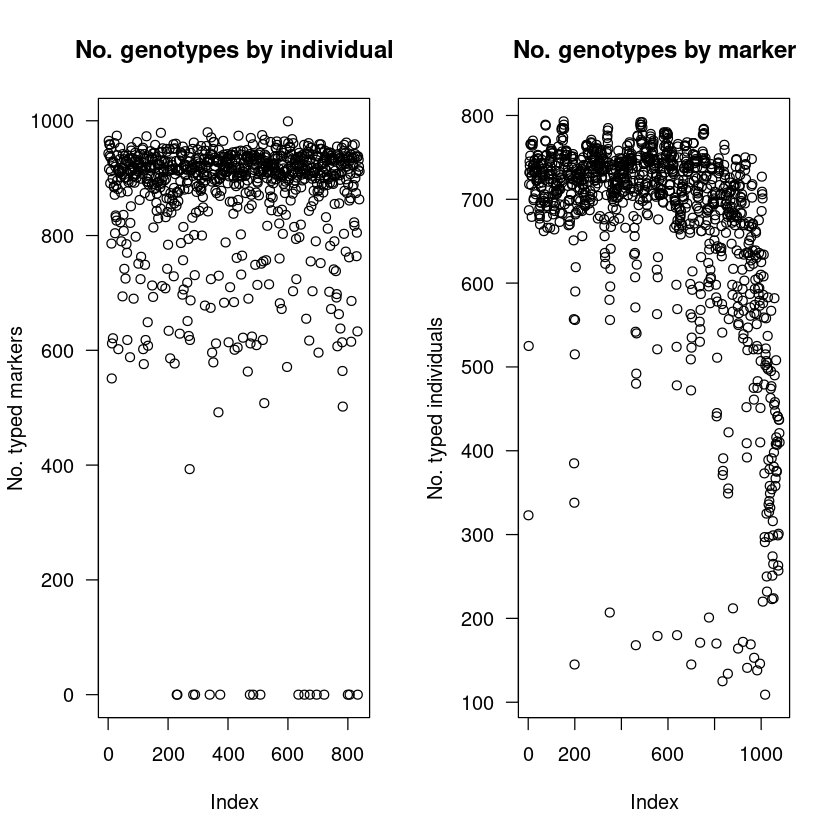

In [16]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [17]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [18]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 839

[1] 839

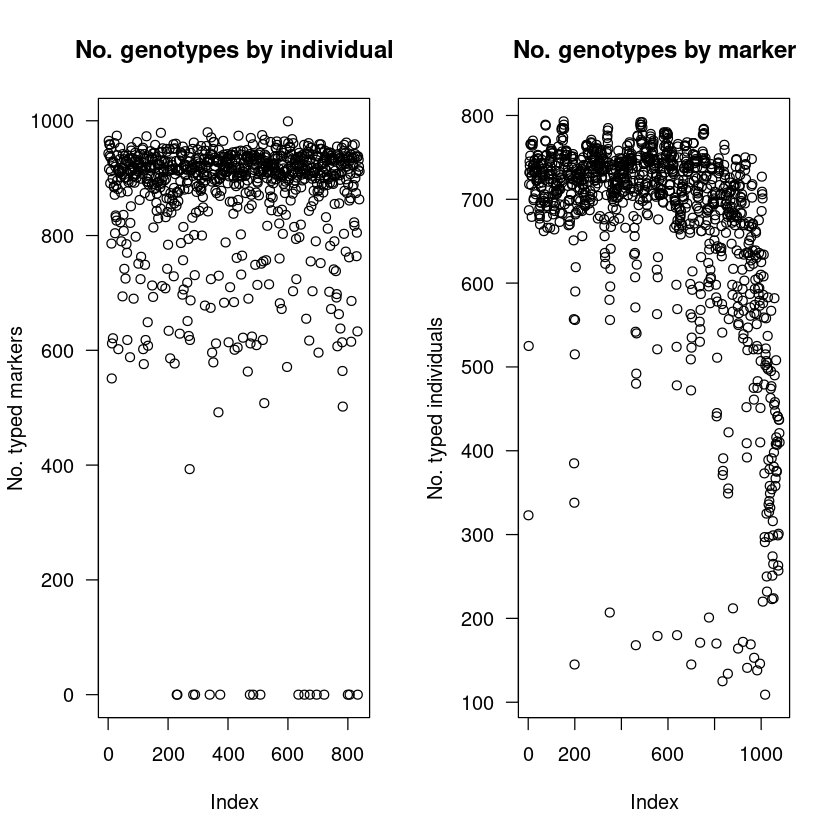

In [19]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [20]:
summary(datf2.2)

    F2 intercross

    No. individuals:    839 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 93.4 93.4 100 100 100 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1079 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  80 
    Genotypes (%):      AA:24.5  AB:49.5  BB:25.9  not BB:0.0  not AA:0.0 

In [21]:
cg <- comparegeno(datf2.2)

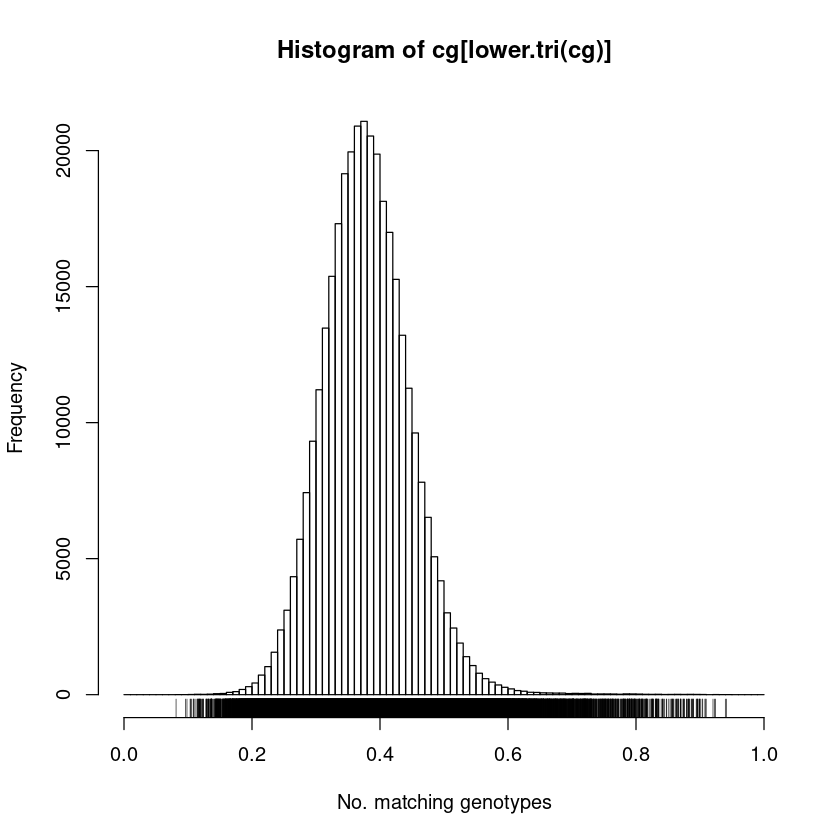

In [22]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [23]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [24]:
wh

,row,col
91202,336,491
128202,468,491
59402,7,621
128402,107,621
91202,336,621
128602,491,621
128602,491,770
95102,621,770
128902,627,770
91202,336,789


In [25]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1" "1-2"

$`1-194`
[1] "1-195" "1-196" "1-197"

$`2-3`
[1] "1-198" "2-0"   "2-1"   "2-2"  

$`2-52`
[1] "2-53"

$`2-146`
[1] "2-147" "2-148" "2-149" "2-150"

$`3-3`
[1] "3-0" "3-1" "3-2"

$`3-107`
[1] "3-108" "3-109" "3-110" "3-111"

$`4-3`
[1] "4-0" "4-1" "4-2"

$`4-19`
[1] "4-18" "4-20"

$`4-55`
[1] "4-56"

$`4-72`
[1] "4-71"

$`4-88`
[1] "4-89" "4-90" "4-91" "4-92"

$`5-3`
[1] "5-0" "5-1" "5-2"

$`5-10`
[1] "5-8" "5-9"

$`5-76`
[1] "5-77"

$`5-79`
[1] "5-80" "5-81" "5-82"

$`6-3`
[1] "5-83" "6-0"  "6-1"  "6-2" 

$`6-42`
[1] "6-43"

$`6-56`
[1] "6-57" "6-58" "6-59" "6-60"

$`7-3`
[1] "7-0" "7-1" "7-2"

$`7-7`
[1] "7-8"

$`7-33`
[1] "7-34" "7-35" "7-36" "7-37"

$`8-3`
[1] "8-0" "8-1" "8-2"

$`8-15`
[1] "8-14"

$`8-33`
[1] "8-34" "8-35" "8-36"

$`9-3`
[1] "8-37" "9-0"  "9-1"  "9-2" 

$`9-19`
[1] "9-18"

$`9-20`
[1] "9-21"

$`9-27`
[1] "9-28" "9-29" "9-30" "9-31"

$`10-3`
[1] "10-0" "10-1" "10-2"

$`10-21`
[1] "10-22" "10-23" "10-24" "10-25"

$`11-3`
[1] "11-0" "11-1

In [26]:
gt <- geno.table(datf2.2)

In [27]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-158,1,94,132,427,186,0,0,6.872934e-06
1-159,1,86,131,437,185,0,0,1.247599e-06
1-160,1,86,131,439,183,0,0,8.601703e-07
1-161,1,81,135,440,183,0,0,2.606454e-06
1-162,1,82,135,441,181,0,0,2.013597e-06
1-163,1,81,138,436,184,0,0,1.160452e-05
1-164,1,83,137,434,185,0,0,1.184132e-05
1-198,1,694,19,99,27,0,0,3.996181e-05
2-7,2,117,134,370,218,0,0,4.552587e-05


In [28]:
length(todrop)

[1] 118

In [29]:
datf2.3 <- datf2.2

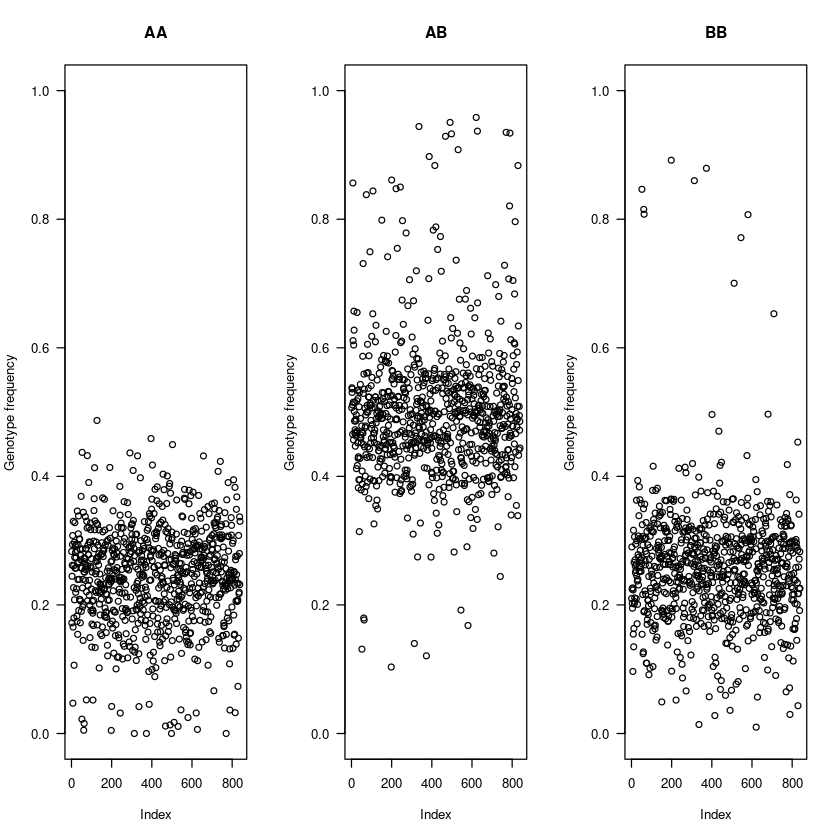

In [30]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

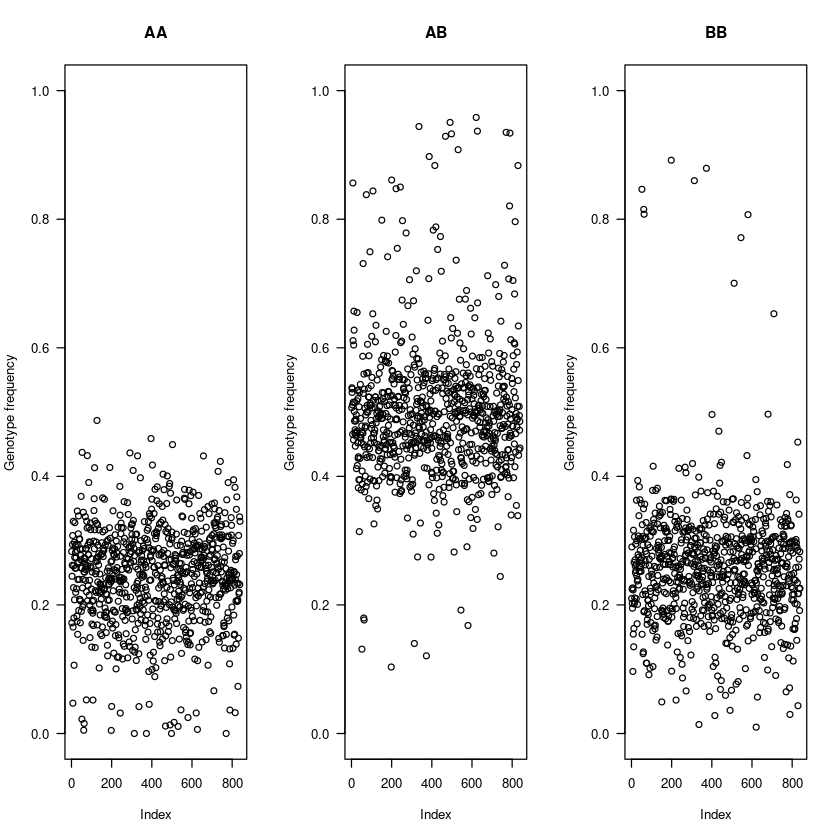

In [31]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [32]:
### do not filter for gfreq

In [33]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [34]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [35]:
datf2.4 <- datf2.3

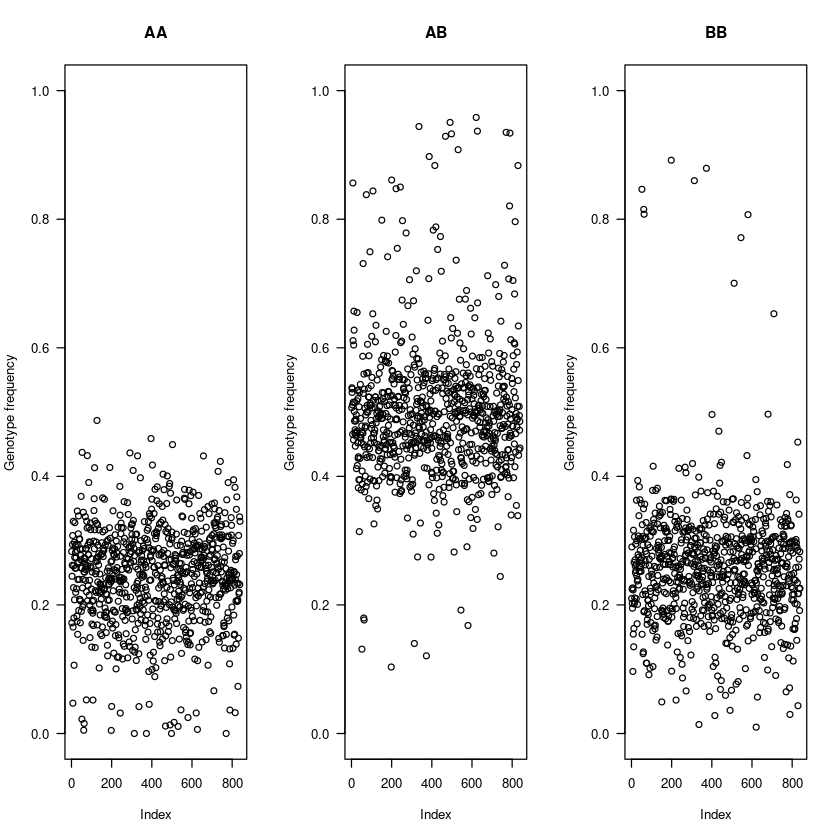

In [36]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [37]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

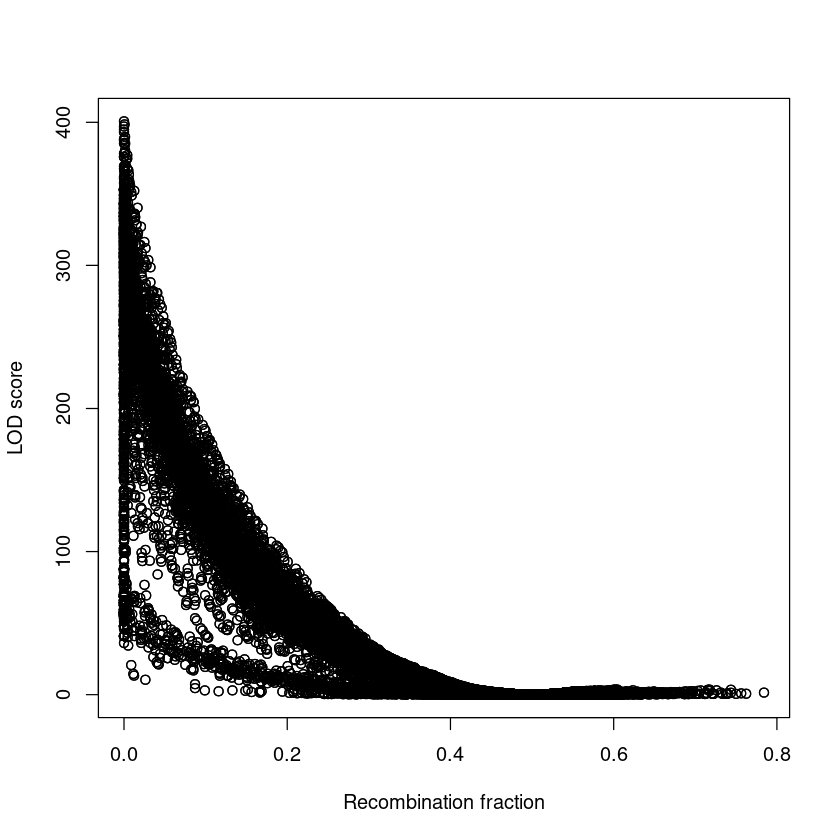

In [38]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

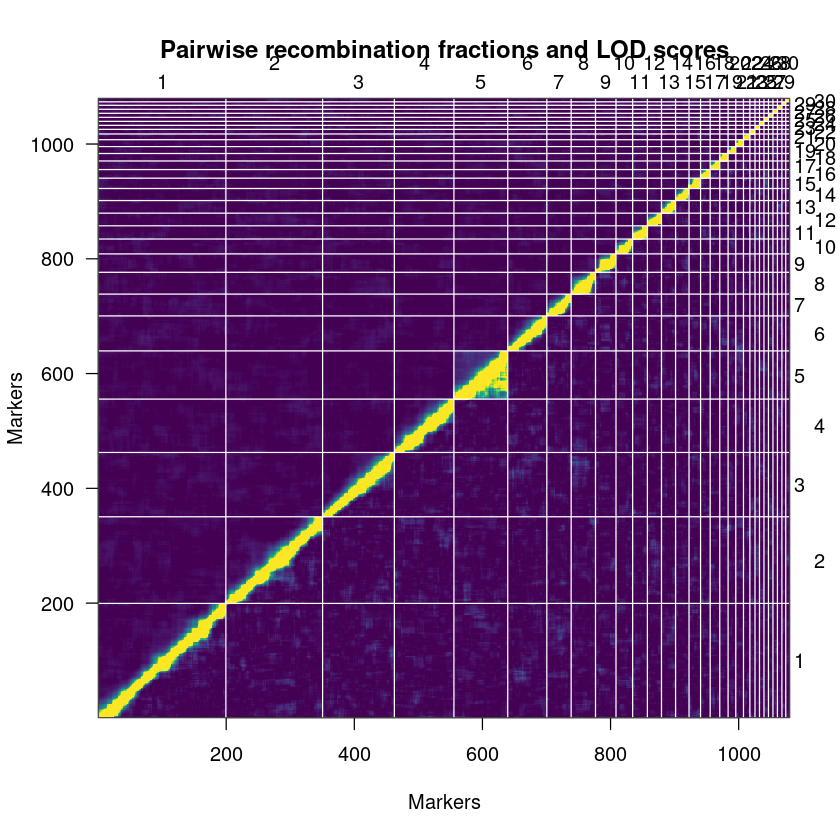

In [39]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [40]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [41]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
,<dbl>,<dbl>,<dbl>,<dbl>
1,199,419.4821456,2.1185967,9.6673406
2,151,310.9192034,2.0727947,11.7722305
3,112,245.7064253,2.2135714,11.3788702
4,93,172.8310486,1.8785984,6.8649616
5,84,161.0855840,1.9407902,15.9789041
6,61,124.7972576,2.0799543,9.1872736
7,38,76.8851552,2.0779772,9.2217308
8,38,62.5739815,1.6911887,8.8118723
9,32,59.3286272,1.9138267,12.8458603


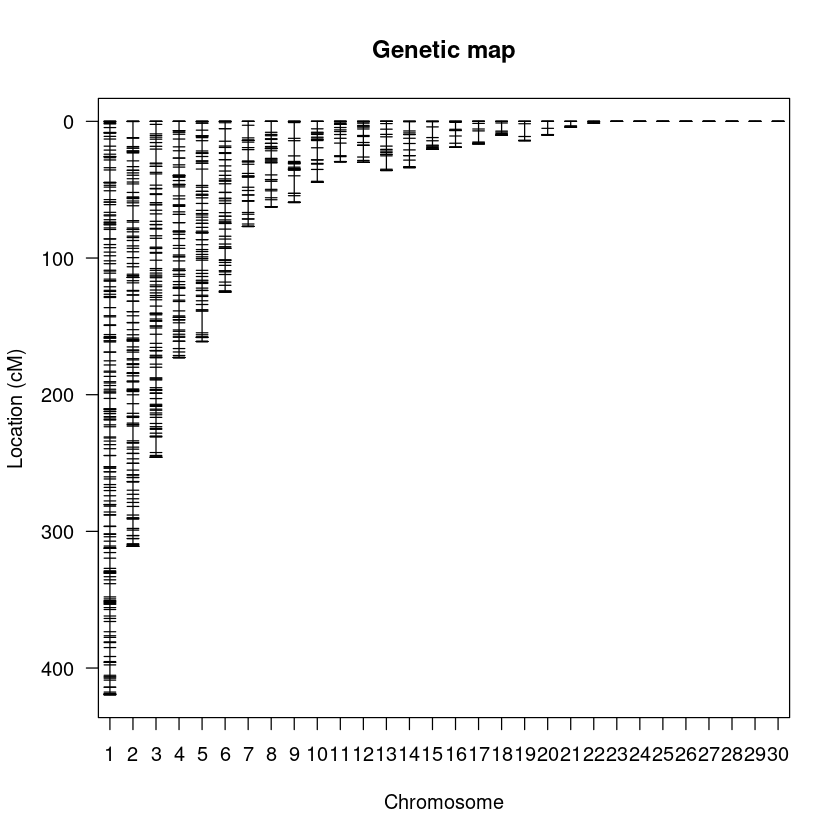

In [52]:
plotMap(genmap)

In [43]:
datf2.4 <- replace.map(datf2.4, genmap)

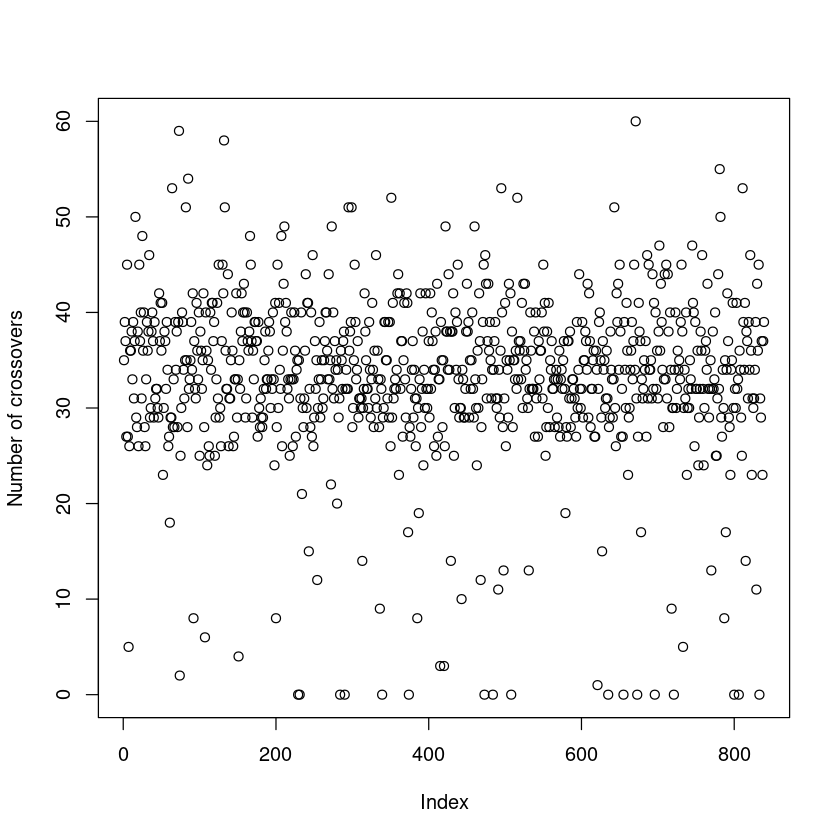

[1] 33.09654

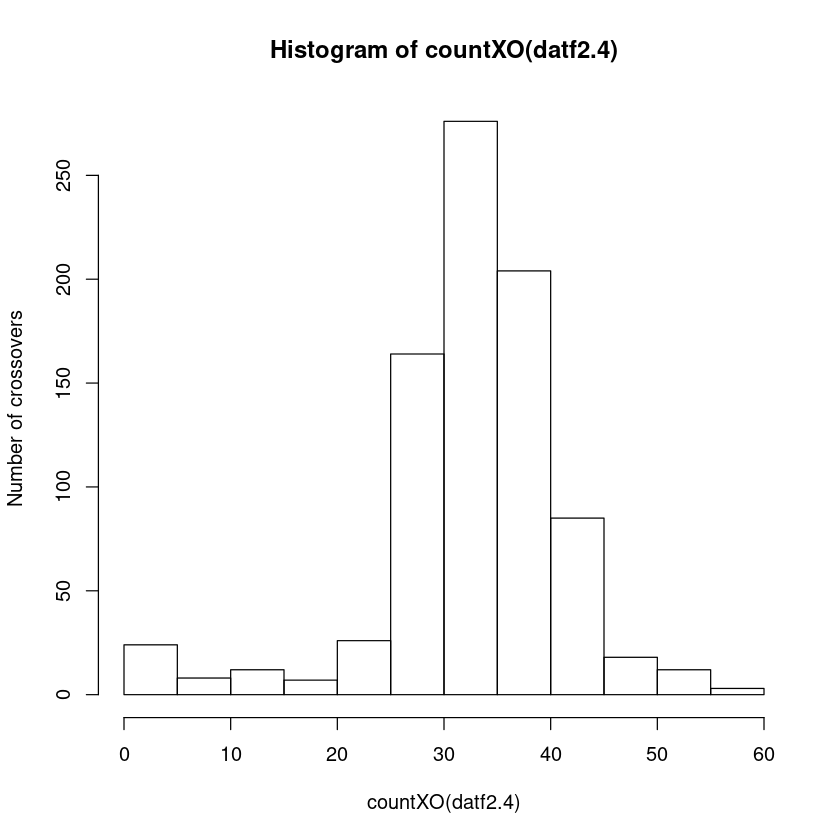

In [44]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [45]:
datf2.5 <- datf2.4

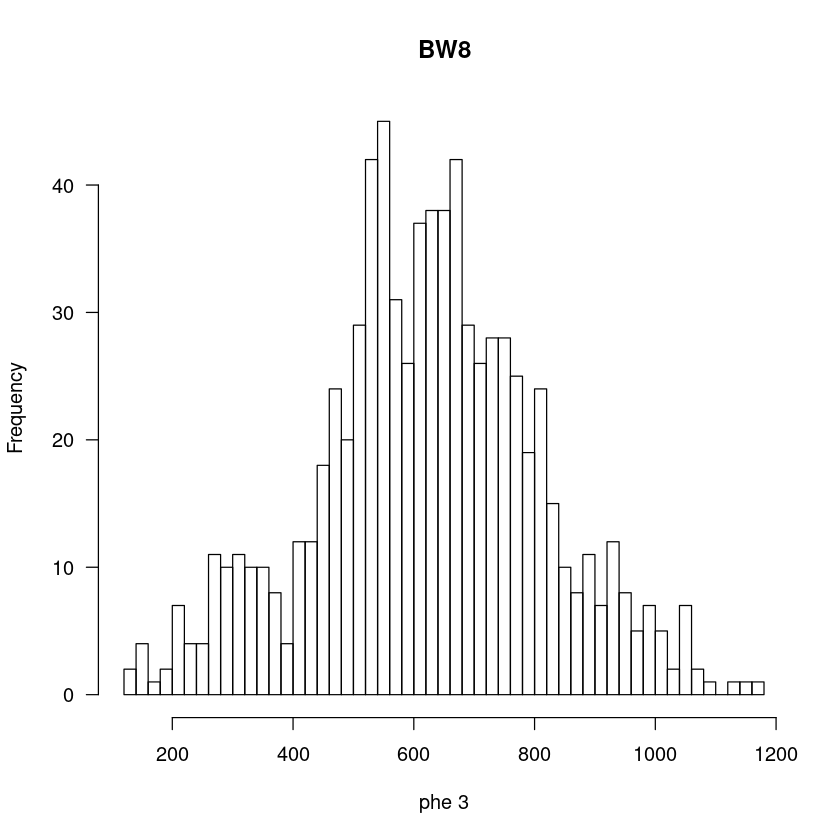

In [46]:
plotPheno(datf2.5, pheno.col=3)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [47]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [48]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [49]:
ac <- pull.pheno(datf2.5, c("SEX")) # only need sex since these are all f2s

In [50]:
out.hk.wbind_all_mark <- scanone(datf2.5, pheno.col = 3, addcovar=ac, method='hk') 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


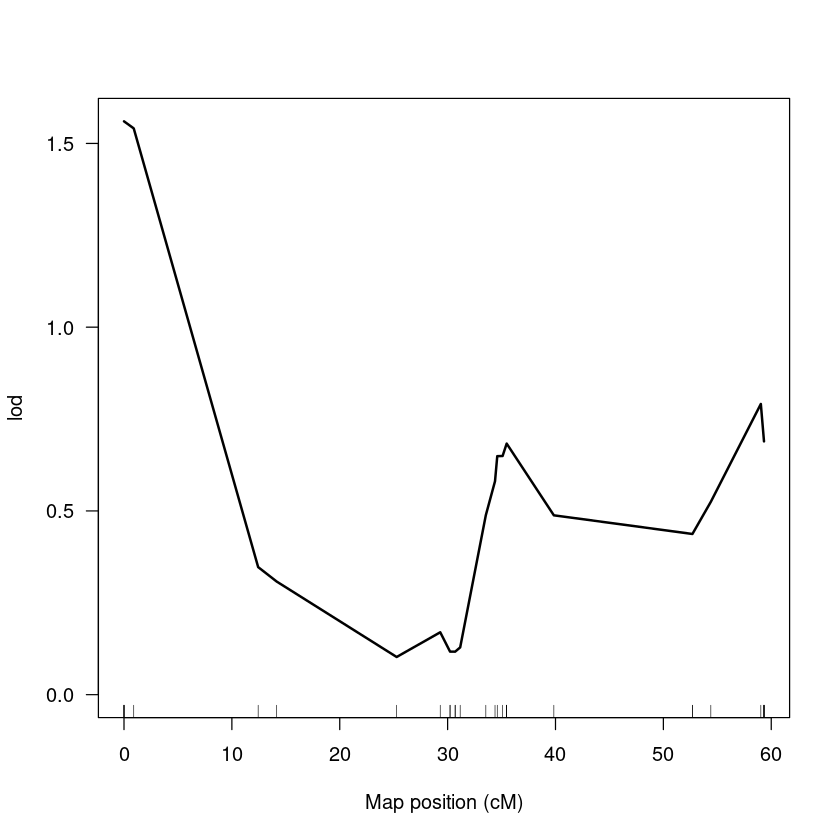

In [107]:
plot(out.hk.wbind_all_mark, chr = 9)

In [51]:
save.image(file = "20201119_rqtl_wahlberg_individs_all_markers.Rdata")